### Data Prepping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing relevant packages

import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import regularizers
from keras.regularizers import l2

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
#bringing in dataset

df = pd.read_csv('/content/drive/MyDrive/Data 4700/CityOfClevelandFinalData.csv')

In [ ]:
#getting a sense of the unique census tracts

df['DW_Tract2020'].unique()

array([39035101101, 39035101102, 39035101300, 39035101400, 39035101501,
       39035101603, 39035101700, 39035101800, 39035101901, 39035102101,
       39035102102, 39035102200, 39035102300, 39035102401, 39035102402,
       39035102700, 39035102800, 39035102900, 39035103300, 39035103500,
       39035103602, 39035103800, 39035104400, 39035104800, 39035105100,
       39035105300, 39035105400, 39035105500, 39035105602, 39035105700,
       39035105900, 39035106100, 39035106200, 39035106500, 39035106600,
       39035106800, 39035106900, 39035107000, 39035107101, 39035107701,
       39035107802, 39035108201, 39035108301, 39035108400, 39035108701,
       39035109301, 39035109701, 39035109801, 39035110901, 39035111202,
       39035111401, 39035111700, 39035112100, 39035112200, 39035112301,
       39035114501, 39035114600, 39035115400, 39035115700, 39035115800,
       39035115900, 39035116300, 39035116400, 39035116500, 39035116600,
       39035116700, 39035116800, 39035116900, 39035117101, 39035

In [ ]:
#getting a sense of the data as a whole

df.head()

,DW_Tract2020,TotalPermits,TotalJobValue,Housing_Permits,Businesses_Permits,Institutional Care_Permits,Food_Permits,Recreation_Permits,Educational_Permits,Hazard_Permits,TotalDemolitionPermits,TotalDemolitionJobValue,ResidentialPermits,CommercialPermits,Total_per_1000,Violent_per_1000,Nonviolent_per_1000,Vice_per_1000,Window,OtherPermits
0,39035101101,18.0,133923.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,8223.0,1.0,0.0,13.659777,5.122321,7.968334,0.569123,2016-01-31 to 2016-06-30,11.0
1,39035101101,17.0,120500.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.096148,4.839961,7.781670,0.474517,2016-02-29 to 2016-07-29,10.0
2,39035101101,21.0,158680.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.860379,5.031246,8.069599,0.759534,2016-03-31 to 2016-08-31,13.0
3,39035101101,19.0,106480.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.674850,4.938208,8.166827,0.569814,2016-04-30 to 2016-09-30,12.0
4,39035101101,27.0,136588.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.917070,5.605946,8.741127,0.569997,2016-05-31 to 2016-10-31,20.0


In [ ]:
#getting the summary statistics for each variable

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DW_Tract2020,13699.0,3.903511e+10,1.054675e+04,3.903510e+10,3.903511e+10,3.903512e+10,3.903512e+10,3.903520e+10
TotalPermits,13699.0,3.717549e+01,2.768295e+01,0.000000e+00,2.200000e+01,3.200000e+01,4.500000e+01,4.120000e+02
TotalJobValue,13699.0,2.704331e+06,1.671471e+07,0.000000e+00,1.625115e+05,3.043561e+05,8.487080e+05,6.116884e+08
Housing_Permits,13699.0,1.234842e+01,8.448646e+00,0.000000e+00,6.000000e+00,1.100000e+01,1.700000e+01,9.500000e+01
Businesses_Permits,13699.0,8.104971e-01,2.593781e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.800000e+01
Institutional Care_Permits,13699.0,4.343383e-02,2.598837e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
Food_Permits,13699.0,1.521279e-01,6.304766e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01
Recreation_Permits,13699.0,1.427841e-01,6.283743e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
Educational_Permits,13699.0,9.117454e-02,3.290486e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
Hazard_Permits,13699.0,3.722899e-03,6.090411e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [ ]:
#dropping columns that will not be used as features

df = df.drop(columns = ['ResidentialPermits', 'CommercialPermits'])

In [ ]:
#getting data types

print(df.dtypes)

DW_Tract2020                    int64
TotalPermits                  float64
TotalJobValue                 float64
Housing_Permits               float64
Businesses_Permits            float64
Institutional Care_Permits    float64
Food_Permits                  float64
Recreation_Permits            float64
Educational_Permits           float64
Hazard_Permits                float64
TotalDemolitionPermits        float64
TotalDemolitionJobValue       float64
Total_per_1000                float64
Violent_per_1000              float64
Nonviolent_per_1000           float64
Vice_per_1000                 float64
Window                         object
OtherPermits                  float64
dtype: object


### Basic Plots

In [ ]:
#making a year column for plots

plotdf = df.copy(deep=True)

plotdf[['Date', 'Date2']] = plotdf['Window'].str.split(' to ', expand=True)
plotdf['Date'] = pd.to_datetime(plotdf['Date'])
plotdf['Year'] = plotdf['Date'].dt.year

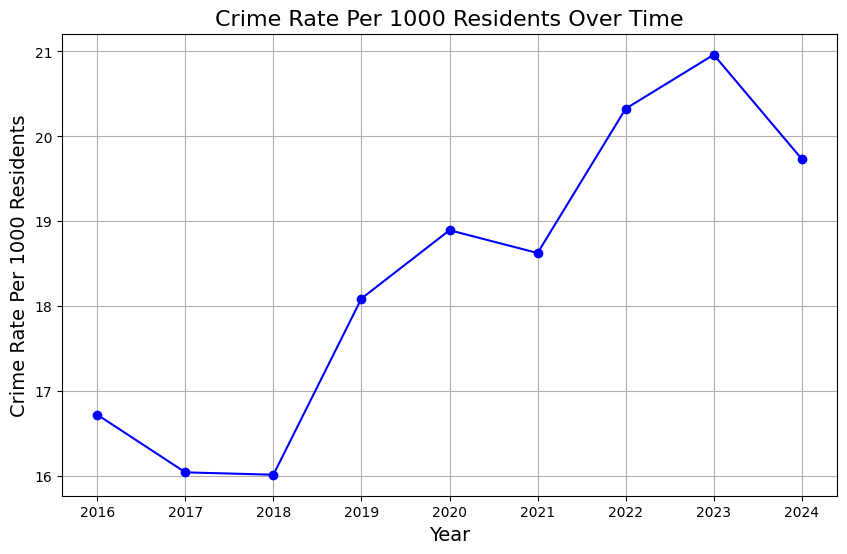

In [ ]:
#plotting crime rate over year

df_avg = plotdf.groupby('Year')['Total_per_1000'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_avg['Year'], df_avg['Total_per_1000'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Crime Rate Per 1000 Residents Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Crime Rate Per 1000 Residents', fontsize=14)

# Show grid
plt.grid(True)

# Display the plot
plt.show()

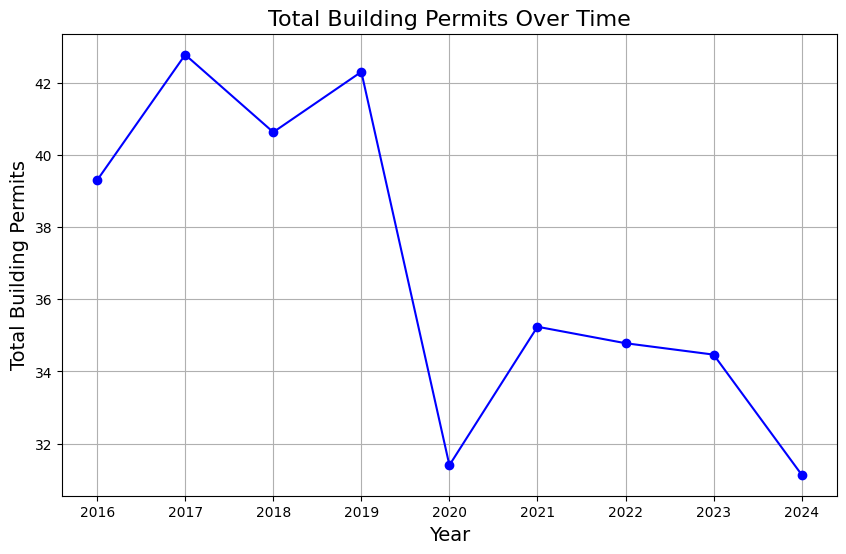

In [ ]:
#plotting building permits over time

df_avg2 = plotdf.groupby('Year')['TotalPermits'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_avg2['Year'], df_avg2['TotalPermits'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Total Building Permits Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Building Permits', fontsize=14)

# Show grid
plt.grid(True)

# Display the plot
plt.show()

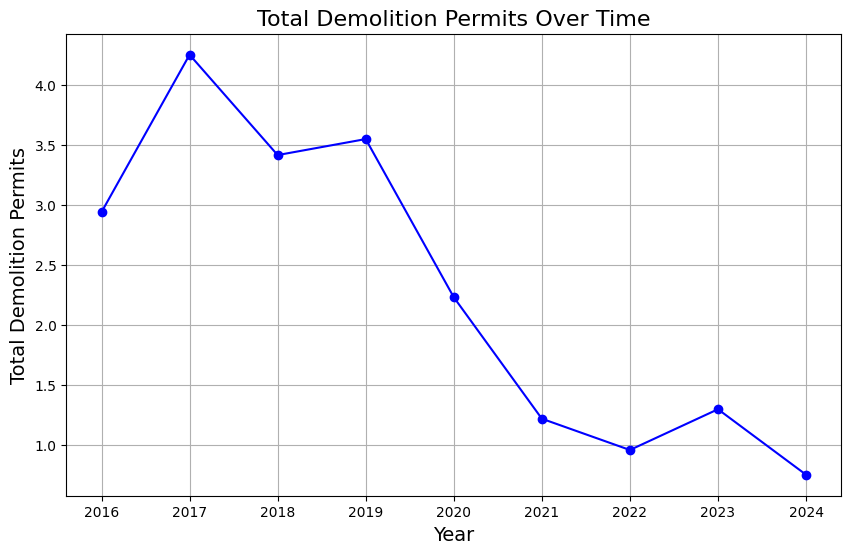

In [ ]:
#plotting demolition permits over time

df_avg3 = plotdf.groupby('Year')['TotalDemolitionPermits'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_avg3['Year'], df_avg3['TotalDemolitionPermits'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Total Demolition Permits Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Demolition Permits', fontsize=14)

# Show grid
plt.grid(True)

# Display the plot
plt.show()

### Original Baseline

In [ ]:
df_baseline = df.copy(deep=True)

In [ ]:
df_baseline[['Window_Start', 'Window_End']] = df_baseline['Window'].str.split(' to ', expand=True)
df_baseline['Window_Start'] = pd.to_datetime(df_baseline['Window_Start'])
df_baseline['Window_End'] = pd.to_datetime(df_baseline['Window_End'])

In [ ]:
df_baseline['Year'] = df_baseline['Window_Start'].dt.year

In [ ]:
average_crimes_year = df_baseline.groupby('Year')['Total_per_1000'].mean().reset_index()
average_crimes_year

,Year,Total_per_1000
0,2016,16.725217
1,2017,16.046384
2,2018,16.018394
3,2019,18.092298
4,2020,18.895973
5,2021,18.627781
6,2022,20.326012
7,2023,20.961436
8,2024,19.734172


In [ ]:
df_baseline = pd.merge(df_baseline, average_crimes_year, on='Year', how='left')

In [ ]:
df_baseline['mae'] = (df_baseline['Total_per_1000_x'] - df_baseline['Total_per_1000_y']).abs()

In [ ]:
df_baseline['mae'].mean()

6.867110119094379

In [ ]:
df_baseline.groupby('Year')['mae'].mean().reset_index()

,Year,mae
0,2016,5.966789
1,2017,6.122295
2,2018,5.711115
3,2019,6.729089
4,2020,6.957515
5,2021,6.745495
6,2022,7.593113
7,2023,8.238206
8,2024,8.364132


### New Baseline

In [ ]:
df_baseline2 = df.copy(deep=True)

In [ ]:
df_baseline2[['Window_Start', 'Window_End']] = df_baseline2['Window'].str.split(' to ', expand=True)
df_baseline2['Window_Start'] = pd.to_datetime(df_baseline2['Window_Start'])
df_baseline2['Window_End'] = pd.to_datetime(df_baseline2['Window_End'])

In [ ]:
df_baseline2['Year'] = df_baseline2['Window_Start'].dt.year

In [ ]:
df_baseline2['Year_pred'] = df_baseline2['Year'] + 1

In [ ]:
avg_crimes = df_baseline2.groupby('Year')['Total_per_1000'].mean().reset_index()

In [ ]:
avg_crimes['Year_pred'] = avg_crimes['Year'] + 1

In [ ]:
avg_crimes = avg_crimes.drop(columns='Year')

In [ ]:
avg_crimes.rename(columns={'Total_per_1000': 'Average_Crime'}, inplace=True)

In [ ]:
avg_crimes_year = df_baseline2.groupby(['Year', 'DW_Tract2020'])['Total_per_1000'].mean().reset_index()

In [ ]:
baseline_merged = pd.merge(avg_crimes_year, avg_crimes, how='left', left_on='Year', right_on='Year_pred')

In [ ]:
baseline_merged = baseline_merged.dropna()

In [ ]:
baseline_merged['mae'] = (baseline_merged['Total_per_1000'] - baseline_merged['Average_Crime']).abs()

<ipython-input-124-5e7be4ecb00d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline_merged['mae'] = (baseline_merged['Total_per_1000'] - baseline_merged['Average_Crime']).abs()


In [ ]:
baseline_merged['mae'].mean()

6.792525734266871

In [ ]:
baseline_merged_year = baseline_merged.groupby('Year')['mae'].mean().reset_index()
baseline_merged_year

,Year,mae
0,2017,5.972548
1,2018,5.524321
2,2019,6.375341
3,2020,6.720327
4,2021,6.460021
5,2022,7.273322
6,2023,7.909644
7,2024,8.104681


### Splitting Data

In [ ]:
#copying the data to a new dataset for features

features_df = df

In [ ]:
#splitting the data by unique census tracts (70% train, 20% validation, 10% test)

unique_tract_numbers = features_df['DW_Tract2020'].unique()
sampled_tract_numbers = pd.Series(unique_tract_numbers).sample(frac=0.7, random_state=42)

train_df1 = features_df[features_df['DW_Tract2020'].isin(sampled_tract_numbers)]

remaining_df = features_df[~features_df['DW_Tract2020'].isin(sampled_tract_numbers)]

unique_tract_numbers2 = remaining_df['DW_Tract2020'].unique()
sampled_tract_numbers2 = pd.Series(unique_tract_numbers2).sample(frac=2/3, random_state=42)

val_df1 = features_df[features_df['DW_Tract2020'].isin(sampled_tract_numbers2)]

sampled_tract_numbers_combined = set(sampled_tract_numbers).union(set(sampled_tract_numbers2))
test_df1 = features_df[~features_df['DW_Tract2020'].isin(sampled_tract_numbers_combined)]

In [ ]:
#creating temporary datasets for normalization and dropping columns that should not be normalized

train_df_holder = train_df1.drop(columns = ['DW_Tract2020', 'Violent_per_1000', 'Nonviolent_per_1000', 'Vice_per_1000', 'Window'])
val_df_holder = val_df1.drop(columns = ['DW_Tract2020', 'Violent_per_1000', 'Nonviolent_per_1000', 'Vice_per_1000', 'Window'])
test_df_holder = test_df1.drop(columns = ['DW_Tract2020', 'Violent_per_1000', 'Nonviolent_per_1000', 'Vice_per_1000', 'Window'])

### Normalization

In [ ]:
features = df.copy(deep=True)
features = features.drop(columns=['DW_Tract2020', 'Violent_per_1000', 'Nonviolent_per_1000', 'Vice_per_1000', 'Window'])
mean = features.mean()
std = features.std()

<ipython-input-131-1a6649e1d958>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


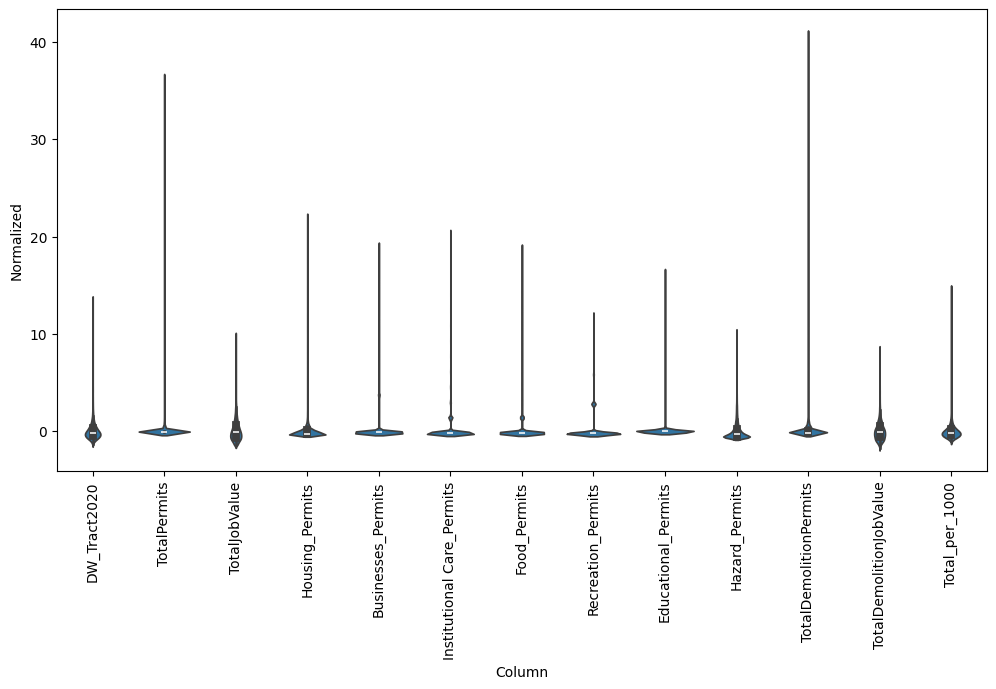

In [ ]:
df_std = (features - mean) / std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [ ]:
train_df_holder = train_df_holder.map(lambda x: np.log(x + 1))
val_df_holder = val_df_holder.map(lambda x: np.log(x + 1))
test_df_holder = test_df_holder.map(lambda x: np.log(x + 1))

<ipython-input-133-f9f0d9ea4e69>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


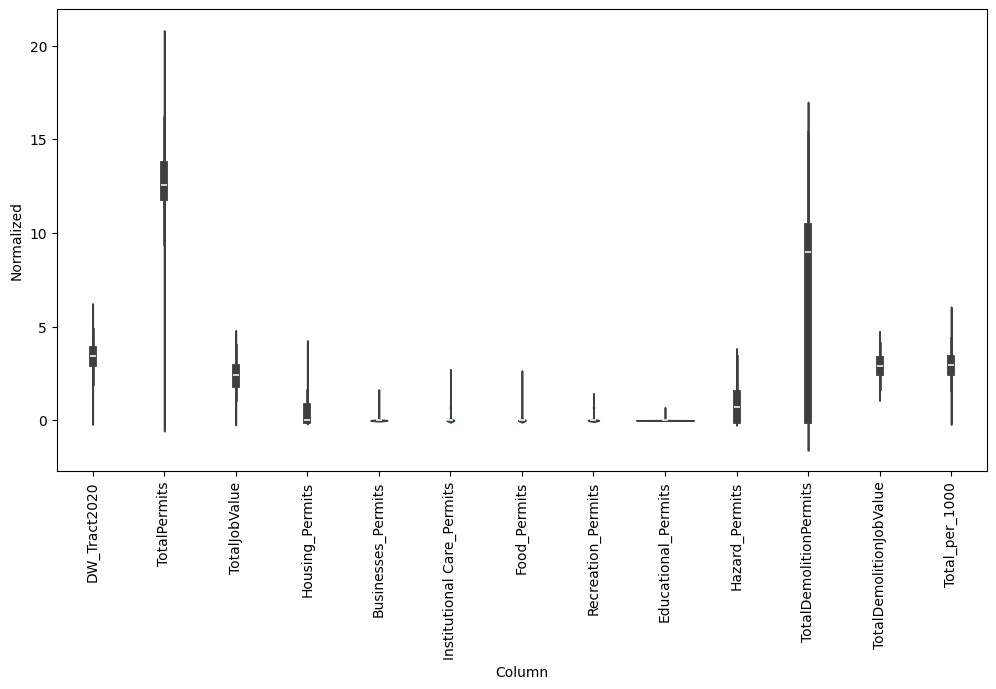

In [ ]:
train_df_holder1 = train_df_holder.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=train_df_holder1)
_ = ax.set_xticklabels(df.keys(), rotation=90)

<ipython-input-134-e7a36984fdf6>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


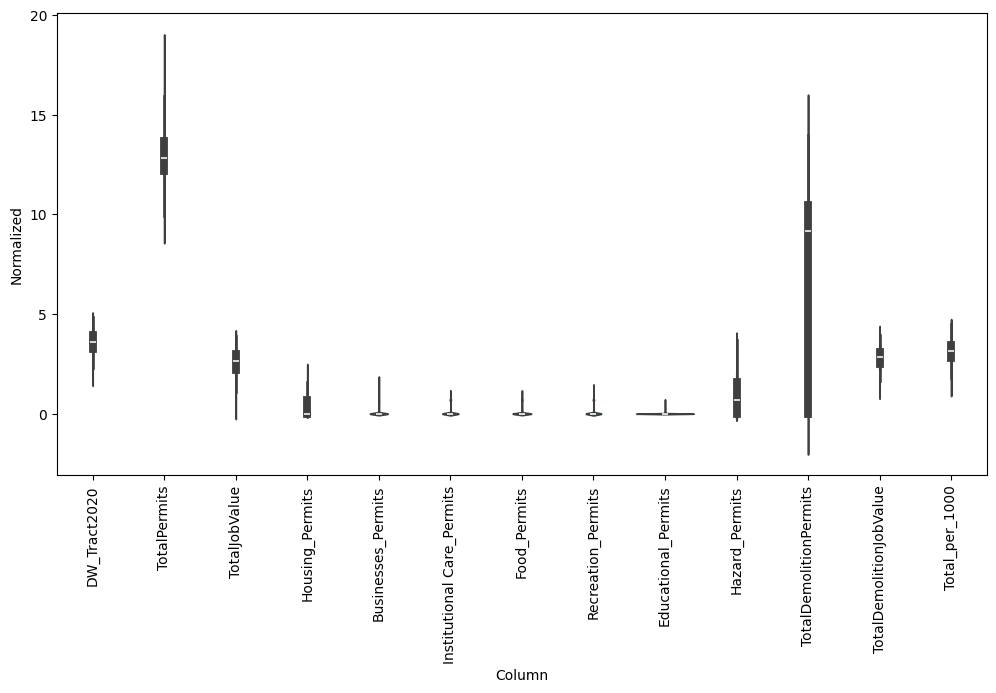

In [ ]:
val_df_holder1 = val_df_holder.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=val_df_holder1)
_ = ax.set_xticklabels(df.keys(), rotation=90)

<ipython-input-135-ca78dcb4f1fd>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


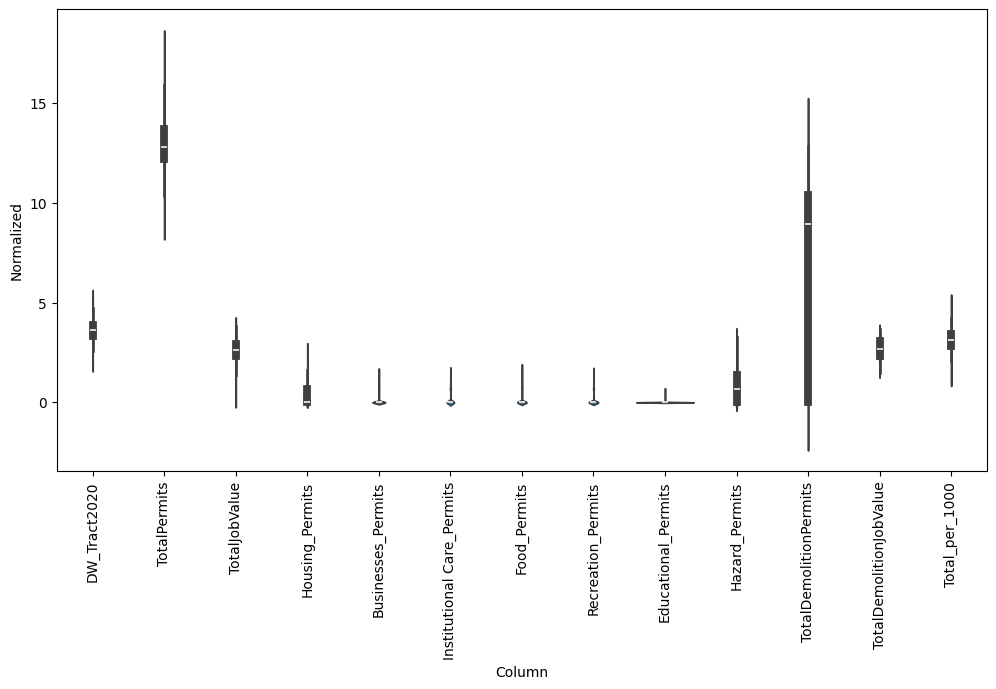

In [ ]:
test_df_holder1 = test_df_holder.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=test_df_holder1)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [ ]:
#adding census tract and time window back in after normalization

train_df = pd.concat([train_df1[['DW_Tract2020', 'Window']], train_df_holder], axis=1)
val_df = pd.concat([val_df1[['DW_Tract2020', 'Window']], val_df_holder], axis=1)
test_df = pd.concat([test_df1[['DW_Tract2020', 'Window']], test_df_holder], axis=1)

### Windowing

In [ ]:
#creating columns for the start and end of the time window in the train, validation, and test dataframes

train_df[['Window_Start', 'Window_End']] = train_df['Window'].str.split(' to ', expand=True)
val_df[['Window_Start', 'Window_End']] = val_df['Window'].str.split(' to ', expand=True)
test_df[['Window_Start', 'Window_End']] = test_df['Window'].str.split(' to ', expand=True)

train_df['Window_Start'] = pd.to_datetime(train_df['Window_Start'])
train_df['Window_End'] = pd.to_datetime(train_df['Window_End'])

val_df['Window_Start'] = pd.to_datetime(val_df['Window_Start'])
val_df['Window_End'] = pd.to_datetime(val_df['Window_End'])

test_df['Window_Start'] = pd.to_datetime(test_df['Window_Start'])
test_df['Window_End'] = pd.to_datetime(test_df['Window_End'])

train_df = train_df.sort_values(by=['DW_Tract2020', 'Window_Start'])
val_df = val_df.sort_values(by=['DW_Tract2020', 'Window_Start'])
test_df = test_df.sort_values(by=['DW_Tract2020', 'Window_Start'])

In [ ]:
#creating windows for each census tract

class WindowGenerator():
    def __init__(self, input_width, label_width, shift, df, label_columns=None):
        self.df = df
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        self.label_columns = label_columns

    def create_windowed_sequences(self):
        inputs = []
        labels = []
        self.columns_to_drop = ['DW_Tract2020', 'Window', 'Window_Start', 'Window_End']
        for tract in self.df['DW_Tract2020'].unique():
            tract_data = self.df[self.df['DW_Tract2020'] == tract]
            for i in range(len(tract_data) - self.input_width - self.shift):
                input_data = tract_data.iloc[i:i + self.input_width].drop(columns=self.columns_to_drop)
                label_data = tract_data.iloc[i + self.input_width + self.shift - self.label_width: i + self.input_width + self.shift]['Total_per_1000']
                inputs.append(input_data.values)
                labels.append(label_data.values)
        return np.array(inputs), np.array(labels)


In [ ]:
#defining parameters: looking at 12 months of data, predicting 1 month, predicting a year later

input_width = 6
label_width = 1
shift = 12

#creating the windows with these parameters for the train, validation, and test dataframes

window_train = WindowGenerator(input_width=input_width, label_width=label_width, shift=shift, df=train_df)
X_train, y_train = window_train.create_windowed_sequences()

window_val = WindowGenerator(input_width=input_width, label_width=label_width, shift=shift, df=val_df)
X_val, y_val = window_val.create_windowed_sequences()

window_test = WindowGenerator(input_width=input_width, label_width=label_width, shift=shift, df=test_df)
X_test, y_test = window_test.create_windowed_sequences()


In [ ]:
#analzying the shape of the dataframes

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (7905, 6, 13)
y_train shape: (7905, 1)
X_val shape: (2295, 6, 13)
y_val shape: (2295, 1)
X_test shape: (1105, 6, 13)
y_test shape: (1105, 1)


### Building The Model

In [ ]:
#constructing the model

def create_model(input_shape, dropout_rate=0.3):
    model = Sequential()
    model.add(layers.Bidirectional(LSTM(units=64, activation='relu', input_shape=input_shape, return_sequences=True)))
    model.add(Dropout(dropout_rate))
    model.add(layers.Bidirectional(LSTM(units=32, activation='relu')))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
    return model

In [ ]:
#altering the learning rate

def lr_schedule(epoch):
    initial_lr = 0.0001
    drop = 0.5
    epochs_drop = 3
    return initial_lr * (drop ** (epoch // epochs_drop))

#early stopping used to optimize epochs

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

#training the model

input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping, lr_scheduler])


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 5.3861 - mae: 2.1031 - val_loss: 0.3171 - val_mae: 0.4455 - learning_rate: 1.0000e-04
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 1.1360 - mae: 0.8558 - val_loss: 0.2470 - val_mae: 0.3925 - learning_rate: 1.0000e-04
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.7113 - mae: 0.6617 - val_loss: 0.1944 - val_mae: 0.3440 - learning_rate: 1.0000e-04
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.5451 - mae: 0.5814 - val_loss: 0.1732 - val_mae: 0.3235 - learning_rate: 5.0000e-05
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.4727 - mae: 0.5448 - val_loss: 0.1645 - val_mae: 0.3136 - learning_rate: 5.0000e-05
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.4135 - mae: 0.5104 - val_loss: 0.1590 - val_mae: 0.3064 - learning_rate: 5.0000e-05
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3899 - mae: 0.4939 - val_loss: 0.1658 - val_mae: 0.3170 - learning_rate: 2.5000

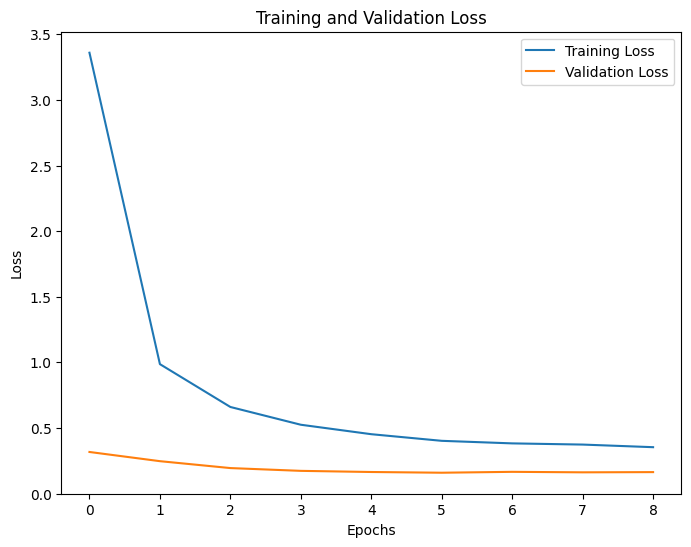

In [ ]:
#plotting training and validation loss

def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)


In [ ]:
#evaluating test loss

test_loss = model.evaluate(X_test, y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1535 - mae: 0.3217


### Making Predictions

In [ ]:
#getting predictions

predictions = model.predict(X_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [ ]:
print('Shape of predictions:', predictions.flatten().shape)
print('Shape of relevant test_df subset:', test_df['Window_End'].iloc[input_width + shift:].shape)

Shape of predictions: (1105,)
Shape of relevant test_df subset: (1321,)


In [ ]:
#creating dataframe for predictions

relevant_window_end = test_df['Window_End'].iloc[input_width + shift:input_width + shift + len(predictions)].reset_index(drop=True)
relevant_test_data = test_df.iloc[input_width + shift:input_width + shift + len(predictions)].reset_index(drop=True)
predictions_df = relevant_test_data.copy()
predictions_df['Predicted_Total_per_1000'] = predictions.flatten()
predictions_df['Actual_Total_per_1000'] = test_df['Total_per_1000'].iloc[input_width + shift + 12:input_width + shift + 12 + len(predictions)].reset_index(drop=True)


In [ ]:
predictions_df['Predicted_Total_per_1000_Reg'] = predictions_df['Predicted_Total_per_1000'].map(lambda x: np.exp(x))
predictions_df['Actual_Total_per_1000_Reg'] = predictions_df['Actual_Total_per_1000'].map(lambda x: np.exp(x))
predictions_df["Total_per_1000_not_normalized"] = predictions_df['Total_per_1000'].map(lambda x: np.exp(x))

In [ ]:
#analyzing the predictions

predictions_df.head(20)

,DW_Tract2020,Window,TotalPermits,TotalJobValue,Housing_Permits,Businesses_Permits,Institutional Care_Permits,Food_Permits,Recreation_Permits,Educational_Permits,...,TotalDemolitionJobValue,Total_per_1000,OtherPermits,Window_Start,Window_End,Predicted_Total_per_1000,Actual_Total_per_1000,Predicted_Total_per_1000_Reg,Actual_Total_per_1000_Reg,Total_per_1000_not_normalized
0,39035103602,2017-07-31 to 2017-12-31,5.129899,16.464917,3.688879,1.098612,0.693147,0.693147,0.000000,0.693147,...,8.699681,3.427963,4.828314,2017-07-31,2017-12-31,2.688103,3.177293,14.703759,23.981757,30.813819
1,39035103602,2017-08-31 to 2018-01-31,5.017280,16.273096,3.465736,0.693147,0.693147,0.693147,0.000000,0.693147,...,8.699681,3.229371,4.753590,2017-08-31,2018-01-31,2.661103,2.981343,14.312060,19.714284,25.263758
2,39035103602,2017-09-30 to 2018-02-28,4.983607,16.161904,3.433987,1.098612,0.693147,0.693147,0.000000,0.000000,...,8.699681,3.204188,4.718499,2017-09-30,2018-02-28,2.625890,2.956487,13.816873,19.230299,24.635482
3,39035103602,2017-10-31 to 2018-03-31,4.912655,16.296253,3.258097,1.386294,1.098612,0.693147,0.000000,0.000000,...,9.375940,3.229909,4.653960,2017-10-31,2018-03-31,2.615759,2.761228,13.677596,15.819254,25.277362
4,39035103602,2017-11-30 to 2018-04-30,4.897840,16.002990,3.218876,1.609438,0.693147,0.000000,0.000000,0.000000,...,9.287394,3.105548,4.653960,2017-11-30,2018-04-30,2.609399,2.737280,13.590881,15.444914,22.321452
5,39035103602,2017-12-31 to 2018-05-31,5.068904,16.116960,3.218876,2.079442,0.693147,1.098612,1.098612,0.000000,...,9.287394,3.147351,4.812184,2017-12-31,2018-05-31,2.669992,2.731750,14.439857,15.359746,23.274329
6,39035103602,2018-01-31 to 2018-06-30,5.093750,16.084575,3.295837,2.197225,0.693147,1.098612,1.098612,0.000000,...,9.287394,3.211074,4.820282,2018-01-31,2018-06-30,2.698771,2.855369,14.861459,17.380842,24.805708
7,39035103602,2018-02-28 to 2018-07-28,5.111988,16.043335,3.258097,2.397895,0.693147,1.098612,1.098612,0.000000,...,9.287394,3.183500,4.836282,2018-02-28,2018-07-28,2.695814,2.910798,14.817574,18.371459,24.131066
8,39035103602,2018-03-31 to 2018-08-31,5.337538,16.501106,3.367296,2.484907,0.693147,1.098612,1.098612,0.000000,...,9.305741,3.142063,5.099866,2018-03-31,2018-08-31,2.651782,3.062499,14.179288,21.380915,23.151581
9,39035103602,2018-04-30 to 2018-09-30,5.389072,16.601370,3.433987,2.708050,0.693147,1.098612,1.386294,0.000000,...,8.699681,3.120552,5.129899,2018-04-30,2018-09-30,2.613213,3.089604,13.642809,21.968384,22.658895


### Accuracy

In [ ]:
predictions_df['mae'] = (predictions_df['Predicted_Total_per_1000_Reg'] - predictions_df['Actual_Total_per_1000_Reg']).abs()

In [ ]:
predictions_df['mae'].mean()

5.641144898146001

**Analzying Prediction Accuracy By Tract**

In [ ]:
mae_by_tract = predictions_df.groupby('DW_Tract2020')['mae'].mean().reset_index()

mae_by_tract

,DW_Tract2020,mae
0,39035103602,10.446689
1,39035106200,2.014621
2,39035110901,2.580275
3,39035115800,7.020930
4,39035117600,2.063105
5,39035118800,3.349909
6,39035119502,4.325084
7,39035119600,11.850997
8,39035121200,11.216479
9,39035122200,3.283700


**Analzying Prediction Accuracy By Crime Rate Totals**

In [ ]:
mae_crimes_by_tract = predictions_df.groupby('DW_Tract2020').agg(
    mae_mean=('mae', 'mean'),
    total_per_1000_mean=('Total_per_1000_not_normalized', 'mean')
).reset_index()

mae_crimes_by_tract

,DW_Tract2020,mae_mean,total_per_1000_mean
0,39035103602,10.446689,24.667090
1,39035106200,2.014621,8.503533
2,39035110901,2.580275,17.565453
3,39035115800,7.020930,22.592443
4,39035117600,2.063105,12.362488
5,39035118800,3.349909,9.982222
6,39035119502,4.325084,16.304366
7,39035119600,11.850997,28.159787
8,39035121200,11.216479,22.843370
9,39035122200,3.283700,13.291565


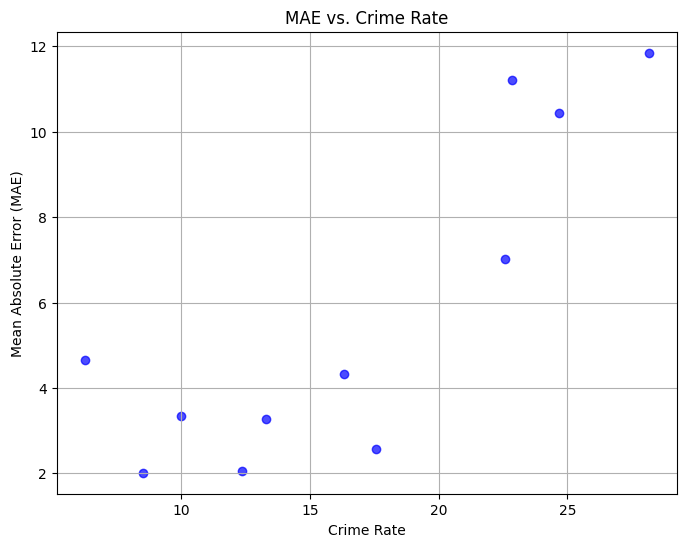

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(mae_crimes_by_tract['total_per_1000_mean'], mae_crimes_by_tract['mae_mean'], color='b', alpha=0.7)  # Scatter plot
plt.title('MAE vs. Crime Rate')
plt.xlabel('Crime Rate')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)

plt.show()

**Analzying Prediction Accuracy By Crime Rate Variance**

In [ ]:
mae_crimes_by_tract_std = predictions_df.groupby('DW_Tract2020').agg(
    mae_mean=('mae', 'mean'),
    total_per_1000_std=('Total_per_1000_not_normalized', 'std')
).reset_index()

mae_crimes_by_tract_std

,DW_Tract2020,mae_mean,total_per_1000_std
0,39035103602,10.446689,3.945904
1,39035106200,2.014621,1.120428
2,39035110901,2.580275,2.658733
3,39035115800,7.020930,2.623536
4,39035117600,2.063105,1.565047
5,39035118800,3.349909,2.300071
6,39035119502,4.325084,3.780818
7,39035119600,11.850997,4.725869
8,39035121200,11.216479,4.045932
9,39035122200,3.283700,2.064885


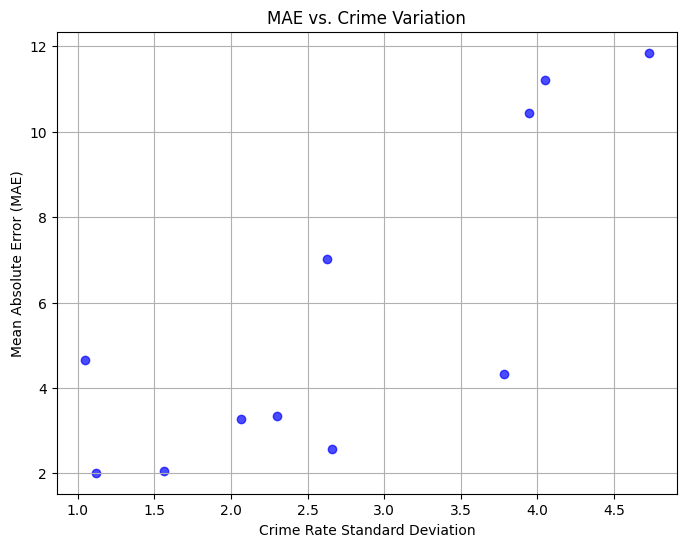

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(mae_crimes_by_tract_std['total_per_1000_std'], mae_crimes_by_tract_std['mae_mean'], color='b', alpha=0.7)  # Scatter plot
plt.title('MAE vs. Crime Variation')
plt.xlabel('Crime Rate Standard Deviation')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)

plt.show()

**Analzying Prediction Accuracy By Tract Population**

In [ ]:
populations = pd.read_csv('/content/drive/MyDrive/Data Capstone/CensusData.csv')

In [ ]:
populations = populations[['Geographic Identifier - FIPS Code', 'Total Population']]

In [ ]:
populations.rename(columns={'Geographic Identifier - FIPS Code': 'DW_Tract2020'}, inplace=True)

In [ ]:
mae_populations = mae_by_tract.merge(populations, how='left', on='DW_Tract2020')

In [ ]:
mae_populations

,DW_Tract2020,mae,Total Population
0,39035103602,10.446689,3584
1,39035106200,2.014621,3492
2,39035110901,2.580275,2912
3,39035115800,7.020930,2803
4,39035117600,2.063105,3712
5,39035118800,3.349909,2769
6,39035119502,4.325084,1770
7,39035119600,11.850997,1861
8,39035121200,11.216479,1229
9,39035122200,3.283700,1900


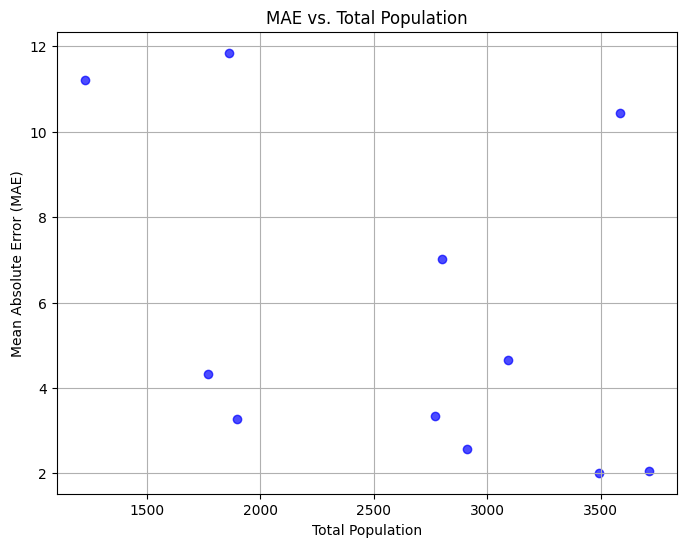

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(mae_populations['Total Population'], mae_populations['mae'], color='b', alpha=0.7)
plt.title('MAE vs. Total Population')
plt.xlabel('Total Population')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)

plt.show()

**Analzying Prediction Accuracy By Year**

In [ ]:
predictions2024 = predictions_df[predictions_df['Window_Start'] > pd.Timestamp('2023-12-31')]

In [ ]:
predictions2024 = predictions2024.copy(deep=True)

predictions2024['mae'] = (predictions2024['Predicted_Total_per_1000_Reg'] - predictions2024['Actual_Total_per_1000_Reg']).abs()

mae_by_tract2024 = predictions2024.groupby('DW_Tract2020')['mae'].mean().reset_index()

mae_by_tract2024

,DW_Tract2020,mae
0,39035103602,9.332831
1,39035106200,1.540287
2,39035110901,1.212096
3,39035115800,0.989390
4,39035117600,3.395362
5,39035118800,4.218536
6,39035119502,5.239036
7,39035119600,7.108720
8,39035121200,2.373402
9,39035122200,6.374209


In [ ]:
predictions_df['Year'] = predictions_df['Window_Start'].dt.year
predictions_df.groupby('Year')['mae'].mean().reset_index()

,Year,mae
0,2016,4.176537
1,2017,3.891389
2,2018,5.099633
3,2019,5.446554
4,2020,6.377977
5,2021,6.761600
6,2022,7.866912
7,2023,6.081592
8,2024,4.178387


### Prediction Visualizations

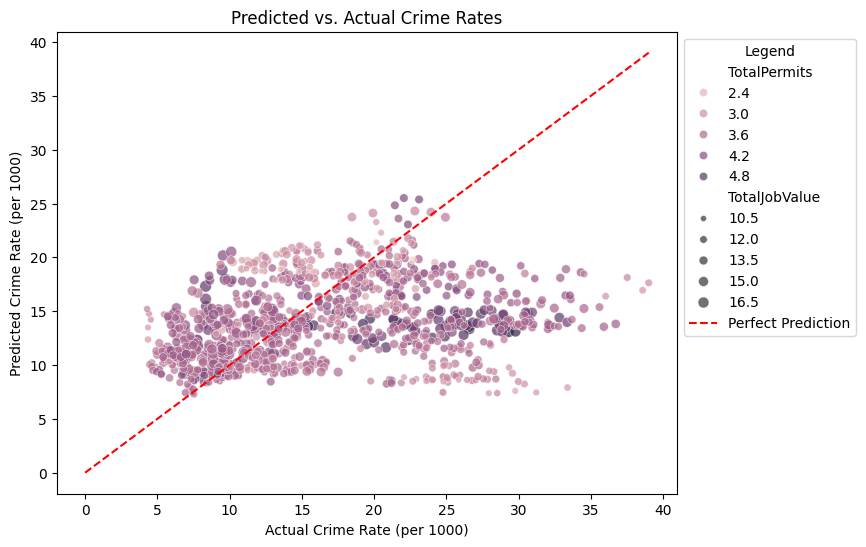

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Actual_Total_per_1000_Reg',
    y='Predicted_Total_per_1000_Reg',
    hue='TotalPermits',  # Optional: Color points by TotalPermits
    size='TotalJobValue',  # Optional: Adjust point size by TotalJobValue
    data=predictions_df,
    alpha=0.7
)
plt.plot([0, predictions_df['Actual_Total_per_1000_Reg'].max()],
         [0, predictions_df['Actual_Total_per_1000_Reg'].max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs. Actual Crime Rates')
plt.xlabel('Actual Crime Rate (per 1000)')
plt.ylabel('Predicted Crime Rate (per 1000)')
plt.legend(title='Legend', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

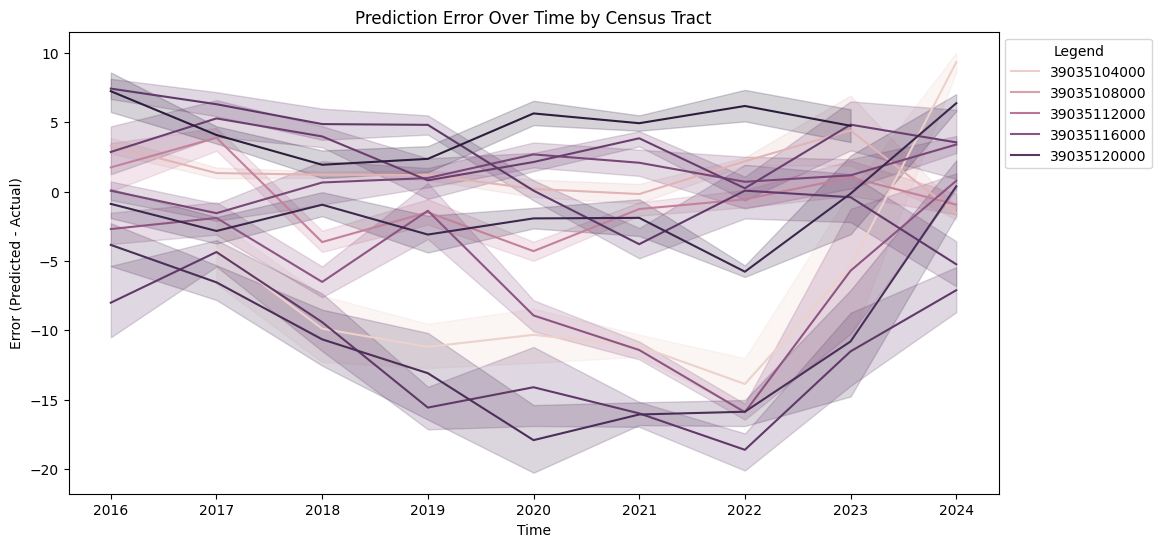

In [ ]:
predictions_df['Error'] = predictions_df['Predicted_Total_per_1000_Reg'] - predictions_df['Actual_Total_per_1000_Reg']
predictions_df['Year'] = predictions_df['Window_Start'].dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Year',
    y='Error',
    hue='DW_Tract2020',
    data=predictions_df
)
plt.title('Prediction Error Over Time by Census Tract')
plt.xlabel('Time')
plt.ylabel('Error (Predicted - Actual)')
plt.legend(title='Legend', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

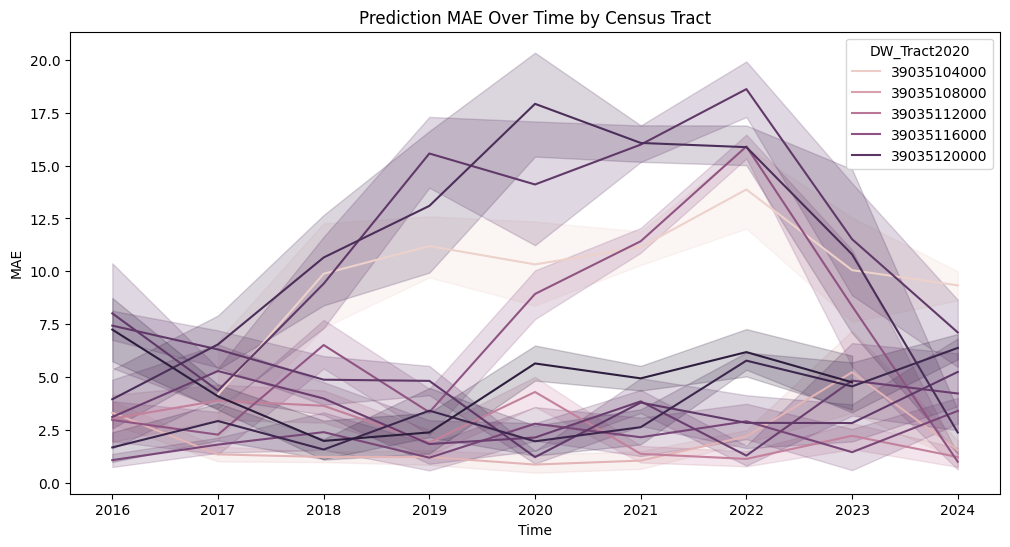

In [ ]:
predictions_df['MAE'] = (predictions_df['Predicted_Total_per_1000_Reg'] - predictions_df['Actual_Total_per_1000_Reg']).abs()
predictions_df['Year'] = predictions_df['Window_Start'].dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Year',
    y='MAE',
    hue='DW_Tract2020',
    data=predictions_df
)
plt.title('Prediction MAE Over Time by Census Tract')
plt.xlabel('Time')
plt.ylabel('MAE')
plt.show()

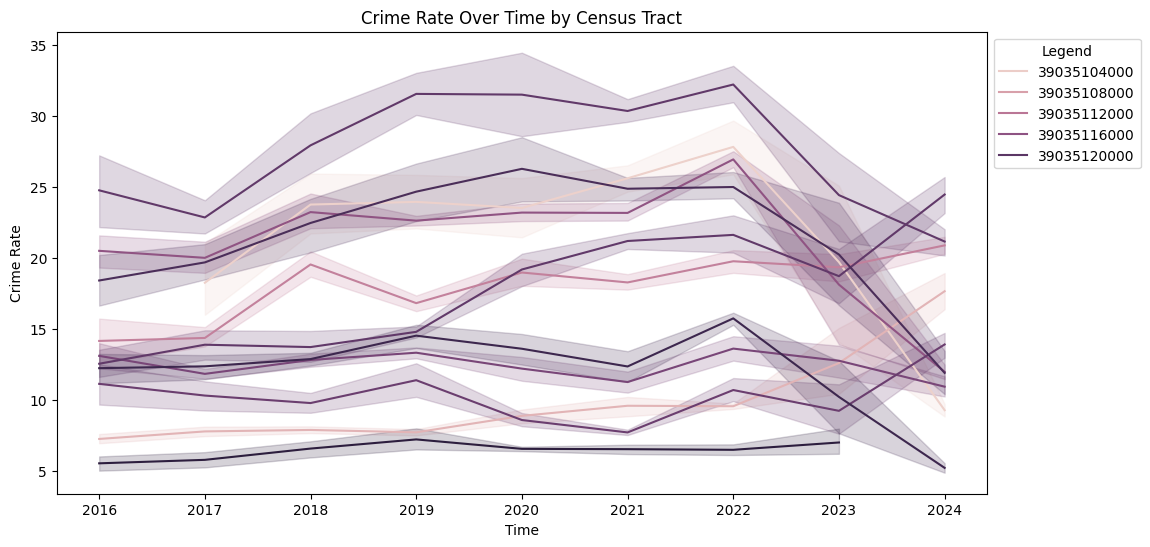

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Year',
    y='Actual_Total_per_1000_Reg',
    hue='DW_Tract2020',
    data=predictions_df
)
plt.title('Crime Rate Over Time by Census Tract')
plt.xlabel('Time')
plt.ylabel('Crime Rate')
plt.legend(title='Legend', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

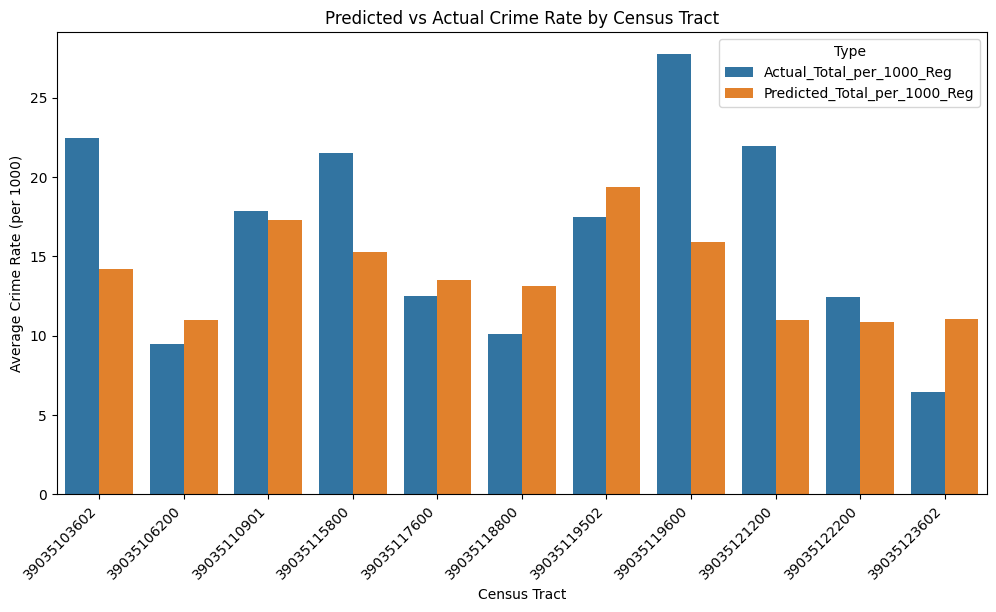

In [ ]:
grouped = predictions_df.groupby('DW_Tract2020').agg({
    'Actual_Total_per_1000_Reg': 'mean',
    'Predicted_Total_per_1000_Reg': 'mean'
}).reset_index()

grouped_melted = grouped.melt(id_vars='DW_Tract2020', var_name='Type', value_name='Crime Rate')

plt.figure(figsize=(12, 6))
sns.barplot(x='DW_Tract2020', y='Crime Rate', hue='Type', data=grouped_melted)
plt.title('Predicted vs Actual Crime Rate by Census Tract')
plt.xlabel('Census Tract')
plt.ylabel('Average Crime Rate (per 1000)')
plt.xticks(rotation=45, ha='right')
plt.show()

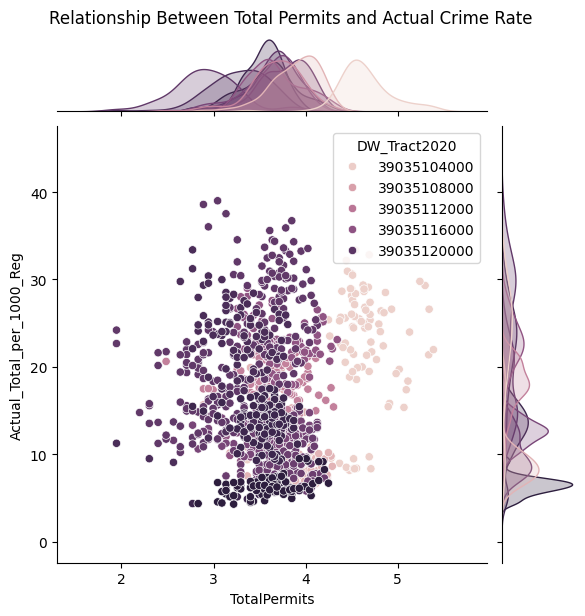

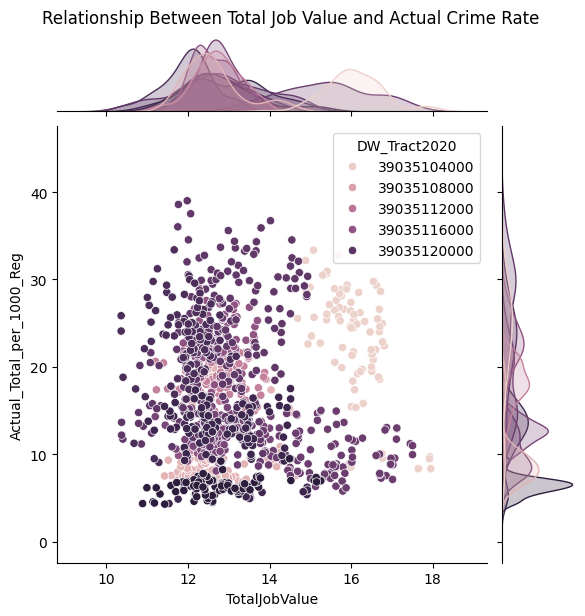

In [ ]:
sns.jointplot(
    x='TotalPermits',
    y='Actual_Total_per_1000_Reg',
    #kind='reg',  # Add a regression line
    data=predictions_df,
    hue='DW_Tract2020'
)
plt.suptitle('Relationship Between Total Permits and Actual Crime Rate', y=1.02)
plt.show()

sns.jointplot(
    x='TotalJobValue',
    y='Actual_Total_per_1000_Reg',
    #kind='reg',
    data=predictions_df,
    hue='DW_Tract2020'
)
plt.suptitle('Relationship Between Total Job Value and Actual Crime Rate', y=1.02)
plt.show()

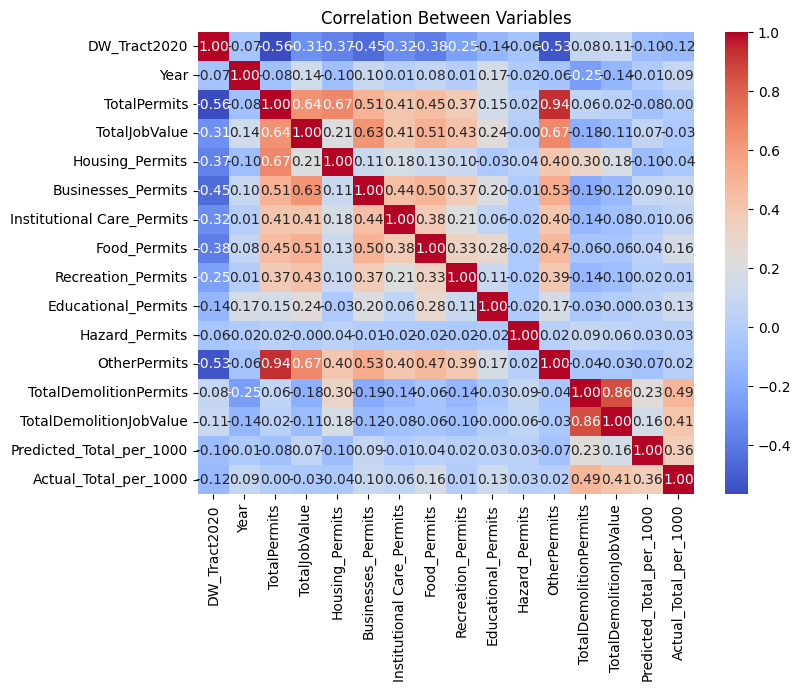

In [ ]:
correlation_matrix = predictions_df[['DW_Tract2020', 'Year', 'TotalPermits', 'TotalJobValue','Housing_Permits',
                                      'Businesses_Permits', 'Institutional Care_Permits', 'Food_Permits','Recreation_Permits',
                                      'Educational_Permits','Hazard_Permits', 'OtherPermits','TotalDemolitionPermits',
                                      'TotalDemolitionJobValue','Predicted_Total_per_1000', 'Actual_Total_per_1000']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Variables')
plt.show()

### Considerations

**Analyzing Standard Deviation By Year**

In [ ]:
std_by_year = predictions_df.groupby('Year')['Total_per_1000_not_normalized'].std().reset_index()
std_by_year

,Year,Total_per_1000_not_normalized
0,2016,5.599041
1,2017,6.437787
2,2018,5.760473
3,2019,7.295039
4,2020,7.598408
5,2021,8.235666
6,2022,7.978183
7,2023,8.131943
8,2024,7.949896


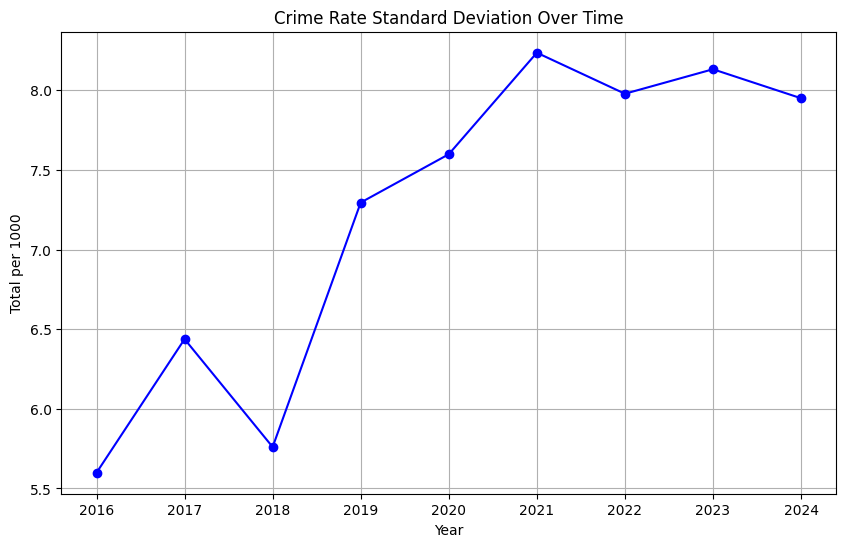

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(std_by_year['Year'], std_by_year['Total_per_1000_not_normalized'], marker='o', linestyle='-', color='b')

plt.title('Crime Rate Standard Deviation Over Time')
plt.xlabel('Year')
plt.ylabel('Total per 1000')

plt.grid(True)

plt.show()

In [ ]:
yeardf = df.copy(deep=True)
yeardf[['Window_Start', 'Window_End']] = yeardf['Window'].str.split(' to ', expand=True)
yeardf['Window_Start'] = pd.to_datetime(yeardf['Window_Start'])
yeardf['Year'] = yeardf['Window_Start'].dt.year

In [ ]:
std_by_year_df = yeardf.groupby('Year')['Total_per_1000'].std().reset_index()
std_by_year_df

,Year,Total_per_1000
0,2016,8.207461
1,2017,8.223896
2,2018,7.813345
3,2019,9.440869
4,2020,9.003282
5,2021,9.250577
6,2022,10.589818
7,2023,11.551536
8,2024,11.795698


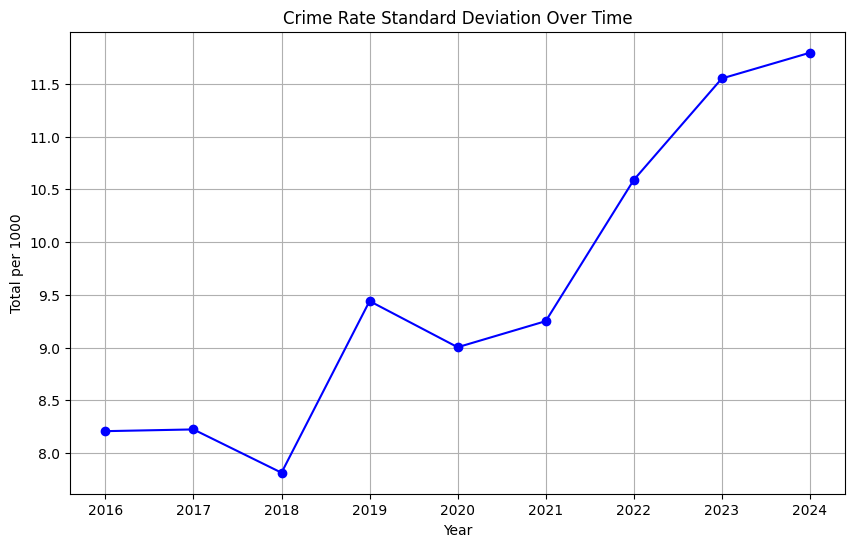

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(std_by_year_df['Year'], std_by_year_df['Total_per_1000'], marker='o', linestyle='-', color='b')

plt.title('Crime Rate Standard Deviation Over Time')
plt.xlabel('Year')
plt.ylabel('Total per 1000')

plt.grid(True)

plt.show()

### Visualizations

In [ ]:
df1 = predictions_df.copy(deep=True)

In [ ]:
pip install geopandas

In [ ]:
pip install folium

In [ ]:
import geopandas as gpd
shapefile_path = '/content/drive/MyDrive/Data Capstone/temp_shapefile/tl_2020_39_tract.shp'
gdf = gpd.read_file(shapefile_path)

In [ ]:
gdf = gdf.drop(columns=['STATEFP', 'COUNTYFP', 'TRACTCE', 'NAME', 'NAMELSAD', 'MTFCC'])
gdf.rename(columns={'GEOID': 'DW_Tract2020'}, inplace=True)

In [ ]:
df1['DW_Tract2020'] = df1['DW_Tract2020'].astype(str)
mae_by_tract['DW_Tract2020'] = mae_by_tract['DW_Tract2020'].astype(str)

In [ ]:
df_tracts_gdf = mae_by_tract.merge(gdf, how='left', on='DW_Tract2020')

In [ ]:
df_tracts_gdf = gpd.GeoDataFrame(df_tracts_gdf, geometry='geometry')
df_tracts_gdf = df_tracts_gdf.to_crs(epsg=4326)

In [ ]:
df_tracts_gdf['INTPTLAT'] = pd.to_numeric(df_tracts_gdf['INTPTLAT'], errors='coerce')
df_tracts_gdf['INTPTLON'] = pd.to_numeric(df_tracts_gdf['INTPTLON'], errors='coerce')

In [ ]:
import folium

map_center = [df_tracts_gdf['INTPTLAT'].mean(), df_tracts_gdf['INTPTLON'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

for _, tract in df_tracts_gdf.iterrows():
    tract_geometry = tract['geometry']
    tract_id = tract['DW_Tract2020']
    mae_value = tract['mae']
    popup_text = f"Census Tract: {tract_id}<br>MAE: {mae_value:.2f}"
    folium.GeoJson(
        tract_geometry,
        name=f"Tract {tract_id}",
        tooltip="Click for more info",  # Optional: Tooltip on hover
        popup=folium.Popup(popup_text, max_width=300)  # Add popup with MAE
    ).add_to(m)

folium.LayerControl().add_to(m)

m
